In [378]:
import numpy as np


## Prepare the data for the calculations

In [379]:
# Define the start and end values, as well as the increment
start_value = 0.01
end_value = 1000
increment = 0.01

In [380]:
# Create an array of data points
data_points = np.arange(start_value, end_value + increment, increment)

In [381]:
# Print the first few data points as an example
print(data_points[:10])  # This will print the first 10 data points
print(len(data_points))


[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
100000


### (a) Compute σ2 of the population D. Let’s call σ2 the true variance of the population D.

In [382]:
meanofallpoints = sum(data_points)/len(data_points)
print(meanofallpoints)

500.005


In [383]:
def calculate_variance(data_points):
    # Calculate the mean (average) of the data points
    mean = sum(data_points) / len(data_points)

    # Calculate the squared differences from the mean
    squared_diff = [(x - mean) ** 2 for x in data_points]

    # Calculate the variance as the average of the squared differences
    variance = sum(squared_diff) / len(data_points)

    return variance


In [384]:

true_variance = calculate_variance(data_points)
print("Variance:", true_variance)


Variance: 83333.333325


True variance of population : 83333.333325

#### Random generator

In [385]:
import time

class SimpleRandom:
    def __init__(self, seed=None):
        if seed is None:
            seed = int(time.time() * 1000000) % 1000000
        self.state = seed

    def rand(self):
        a = 1664525
        c = 1013904223
        m = 2**32
        self.state = (a * self.state + c) % m
        return self.state
    def randrange(self, start, stop):

        range_size = stop - start
        rand_num = self.rand() % range_size
        return start + rand_num

    def generaterandomnuniquenumbers(self, n, func):
        if n <= 0:
            return set()

        unique_numbers = set()
        while len(unique_numbers) < n:
            unique_numbers.add(func())

        return unique_numbers

    def generaterandomnrangeuniquenumbers(self, n, start, stop):
        if n <= 0 or start >= stop:
            return set()

        range_size = stop - start
        if n > range_size:
            n = range_size

        unique_numbers = []
        while len(unique_numbers) < n:
            num = self.randrange(start, stop)
            if num not in unique_numbers:
                unique_numbers.append(num)

        return unique_numbers



In [386]:
random_generator = SimpleRandom()
print(random_generator)

#### Use sampling with replacement, to randomly sample 50 points {y1, . . . , y50} from the population D, i.e., for 1 ≤ i ≤ 50, yi ∈ D. Compute s1, s2 and s3 defined as

### Choosing random 50 points

In [387]:
# Number of iterations
num_iterations = 10  # You can change this to the desired number of iterations

In [388]:
fiftypoints= []
totalpoints = 100000

In [389]:
# Choose 50 unique indexes without repetition
while len(fiftypoints) < 50 :
    index = random_generator.rand() % totalpoints
    # if index not in fiftyindex:
    fiftypoints.append(data_points[index])


In [390]:
print(fiftypoints)

[194.57999999999998, 987.01, 167.0, 321.59, 404.86, 699.53, 739.2, 263.55, 657.38, 498.77, 309.48, 147.91, 246.22, 211.60999999999999, 238.48, 286.35, 694.9, 177.89, 795.0, 919.19, 298.46, 388.97, 430.88, 770.27, 769.22, 87.73, 400.84, 268.71, 879.98, 95.61000000000001, 342.64, 487.79, 441.62, 286.21, 272.6, 640.3100000000001, 672.38, 961.61, 680.96, 482.43, 534.82, 519.57, 383.4, 144.71, 531.66, 180.25, 360.4, 138.51, 429.62, 707.8100000000001]


In [391]:
meanoffiftypoints = sum(fiftypoints) /50
print( meanoffiftypoints)

451.00939999999986


In [392]:
numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]

In [393]:
print(numerators)

[65756.03718435993, 287296.64320036006, 80661.33928835992, 16749.381096359968, 2129.7671203599857, 61762.488624360056, 83053.8219283601, 35141.02664835994, 42588.82454436005, 2281.0749123600117, 20030.571064359956, 91869.2462803599, 41938.69835235994, 57312.07272035994, 45168.745864359946, 27112.718008359945, 59482.62476836006, 74594.20665635994, 118329.5328883601, 219193.0742163602, 23271.319440359963, 3848.8871523599787, 405.19274435999444, 101927.33071236008, 101257.9859523601, 131971.92246435987, 2516.9686963599884, 33233.071240359954, 184015.77566436015, 126308.73352035989, 11743.926856359973, 1352.812536360012, 88.16083235999723, 27158.842240359958, 31829.91400835994, 35834.71716036008, 49004.94254436006, 260712.97272036015, 52877.27844036008, 987.2541043600094, 7024.216672360032, 4700.555872360026, 4571.0309683599835, 93819.32244035993, 6504.519280360018, 73310.65268835993, 8210.063368359979, 97655.87500035991, 457.5064323599937, 65946.54816036011]


In [394]:
numerator_after_addsquare_mean = sum(numerators)

In [395]:
print(numerator_after_addsquare_mean)

2975000.1952820006


In [396]:
s1square = numerator_after_addsquare_mean/51
print("s1square is " , s1square)

s1square is  58333.33716239217


In [397]:
s2square = numerator_after_addsquare_mean/50
print("s2square is " , s2square)

s2square is  59500.00390564001


In [398]:
s3square = numerator_after_addsquare_mean/ 49
print("s3square is " , s3square)

s3square is  60714.28969963267


-----------------------------------------------------------------------------------------------------------------------------

In [399]:
import matplotlib.pyplot as plt

In [400]:
# Initialize average scores
avg_s1_squared = 0
avg_s2_squared = 0
avg_s3_squared = 0

In [401]:
# Number of iterations
num_iterations = 10  # You can change this to the desired number of iterations

In [402]:
list_of_average_s1_2 , list_of_average_s2_2 , list_of_average_s3_2 = [],[],[]

In [403]:
iterations = []

In [404]:
# Perform multiple iterations
# plotting every 20 , 5 times
iteration_count = 0
for iteration in range(num_iterations):
    avg_s1_squared = 0 
    avg_s2_squared = 0 
    avg_s3_squared = 0
    for t in range (20):
        # Perform sampling with replacement to randomly select 50 points from the population
        fiftypoints= []
        totalpoints = 100000
        sample_size = 50
        # Choose 50 unique indexes without repetition
        while len(fiftypoints) < 50 :
            index = random_generator.rand() % totalpoints
            # if index not in fiftyindex:
            fiftypoints.append(data_points[index])

        meanoffiftypoints = sum(fiftypoints) /50
        numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]
        numerator_after_addsquare_mean = sum(numerators)
        
        # Calculate s^2_1, s^2_2, and s^2_3 for the current iteration
        s1_squared = numerator_after_addsquare_mean/51 # Sample variance with population correction
        s2_squared = numerator_after_addsquare_mean/50  # Sample variance with Bessel's correction
        s3_squared = numerator_after_addsquare_mean/49  # Sample variance with another degree of freedom
        avg_s1_squared += (s1_squared)
        avg_s2_squared += (s2_squared)
        avg_s3_squared += (s3_squared)
    
    iteration_count += 20
    iterations.append(iteration_count)
        
    avg_s1_squared = avg_s1_squared / 20
    avg_s2_squared = avg_s2_squared / 20
    avg_s3_squared = avg_s3_squared / 20
    list_of_average_s1_2.append(avg_s1_squared)
    list_of_average_s2_2.append(avg_s2_squared)
    list_of_average_s3_2.append(avg_s3_squared)
    
    



In [405]:
# Print the average scores after multiple iterations
print("Average s^2_1:", list_of_average_s1_2)
print("Average s^2_2:", list_of_average_s2_2)
print("Average s^2_3:", list_of_average_s3_2)


Average s^2_1: [78695.85017829805, 80101.24655112941, 79912.91214410197, 77798.69268170197, 77143.99080411765, 79562.73380722353, 74742.37731178822, 80733.17213230589, 76576.52777666665, 82237.49022899609]
Average s^2_2: [80269.76718186401, 81703.271482152, 81511.170386984, 79354.66653533601, 78686.87062019999, 81153.98848336798, 76237.22485802401, 82347.835574952, 78108.0583322, 83882.240033576]
Average s^2_3: [81907.92569577959, 83370.6851858694, 83174.66366018774, 80974.14952585308, 80292.72512265305, 82810.19232996735, 77793.08658982042, 84028.40364791022, 79702.1003389796, 85594.12248324082]


### (d) Use three different scatter plots to visualize the change in Avgs2 i , for 1 ≤ i ≤ 3 over increasing number of iterations and compare it with σ2 the true variance of D.

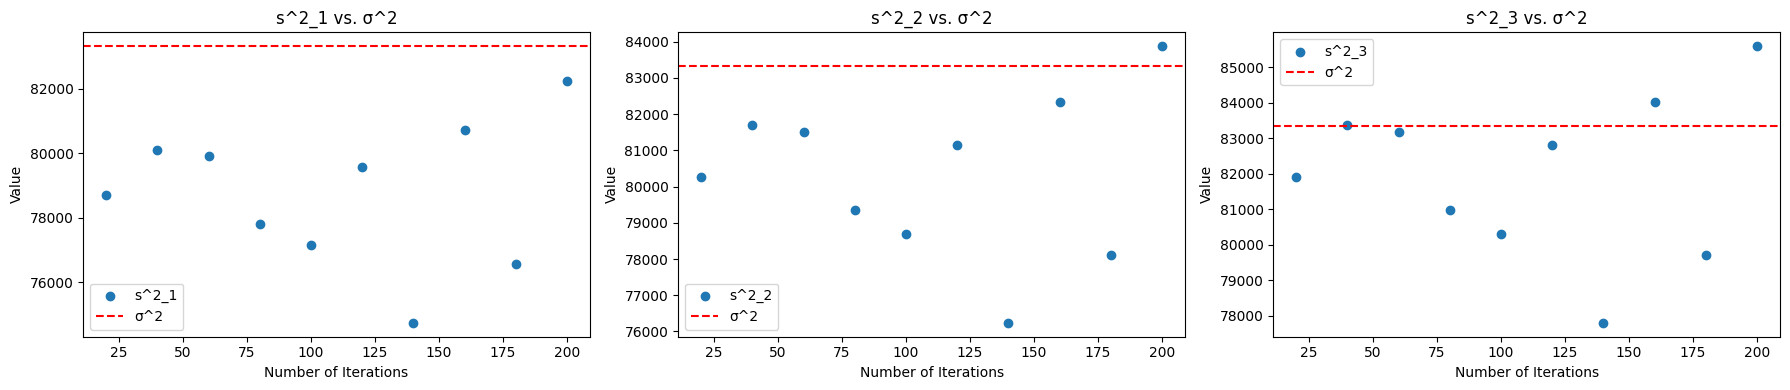

In [406]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 4))

# Scatter plot for s^2_1
plt.subplot(131)
plt.scatter(iterations, list_of_average_s1_2, label='s^2_1', marker='o')
plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')

# plt.plot(iterations, true_variance, label='σ^2', linestyle='--', color='red')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.title('s^2_1 vs. σ^2')
plt.legend()

plt.subplot(132)
plt.scatter(iterations, list_of_average_s2_2, label='s^2_2', marker='o')
plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.title('s^2_2 vs. σ^2')
plt.legend()

plt.subplot(133)
plt.scatter(iterations, list_of_average_s3_2, label='s^2_3', marker='o')
plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.title('s^2_3 vs. σ^2')
plt.legend()

plt.tight_layout()
plt.show()


## part e Repeat (b), (c) & (d) multiple times and notice among Avgs2 1, Avgs2 2 and Avgs2 3 which score approaches to the true variance much quickly or frequently. Argue its reason.

# Repeating the same experiment 10 times and writing observation

Average s^2_1: [80677.17807439217, 79454.93003574117, 79098.43940910588, 76138.29994068235, 82806.4192591451, 78735.06933387449, 80870.16593723136, 82691.30864631373, 73279.76929108235, 82612.00055671373]
Average s^2_2: [82290.72163587999, 81044.02863645603, 80680.40819728801, 77661.06593949601, 84462.547644328, 80309.77072055203, 82487.56925597599, 84345.13481924, 74745.364676904, 84264.240567848]
Average s^2_3: [83970.12411824489, 82697.98840454694, 82326.94714008979, 79245.98565254694, 86186.27310645714, 81948.74563321634, 84170.9890367102, 86066.46410126532, 76270.7802825551, 85983.91894678367]


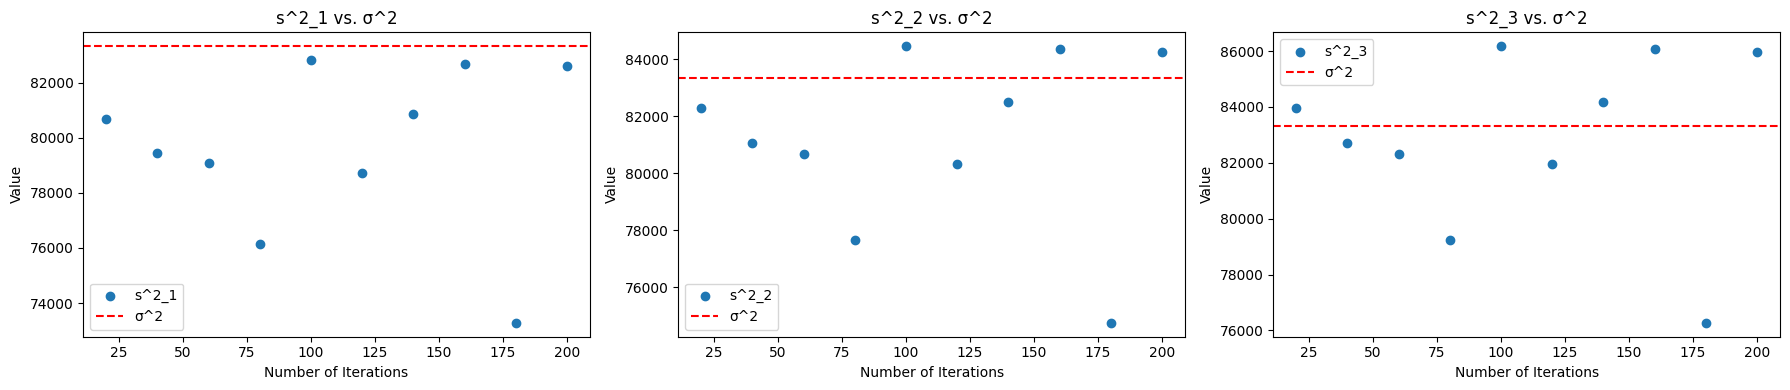

Average s^2_1: [81490.27847683922, 78897.69534937255, 78583.81551125491, 83743.08357261961, 83201.46703564707, 80522.34848869804, 78756.28303702745, 79311.0097192549, 81910.09353754511, 75985.82537265099]
Average s^2_2: [83120.08404637598, 80475.64925636002, 80155.49182148, 85417.945244072, 84865.49637636, 82132.795458472, 80331.40869776801, 80897.22991364001, 83548.295408296, 77505.54188010402]
Average s^2_3: [84816.4122922204, 82118.0094452653, 81791.31818518366, 87161.16861640001, 86597.445282, 83808.97495762446, 81970.82520180408, 82548.19378942857, 85253.36266152655, 79087.28763275918]


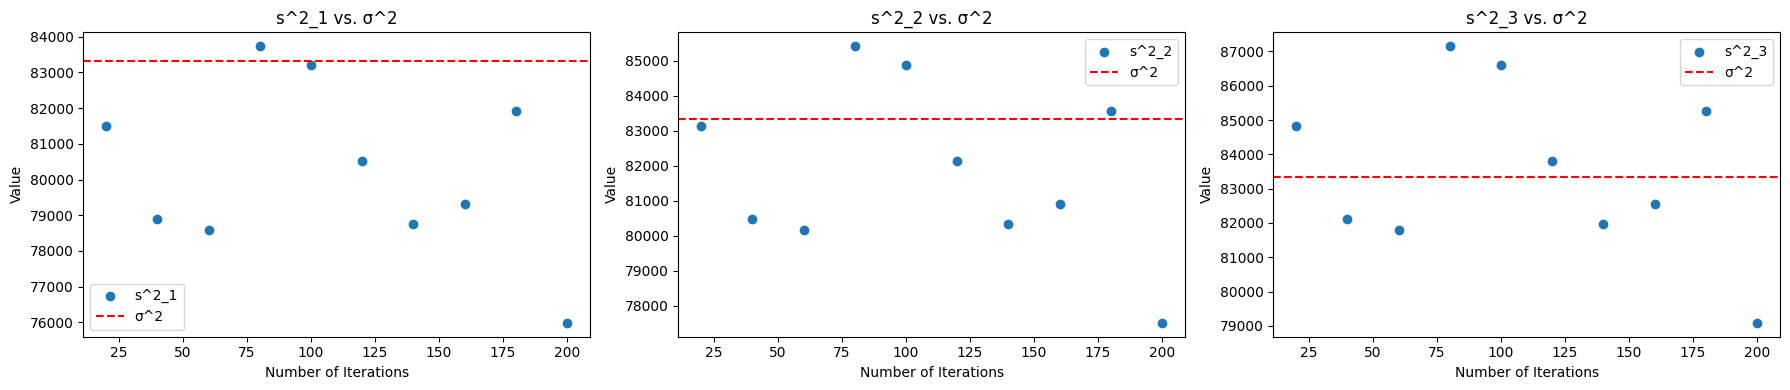

Average s^2_1: [79667.73632744314, 78004.97752010197, 79155.04250570196, 82766.9662375294, 84350.58739203922, 77713.99746149805, 79159.20430498039, 77512.79998937256, 76925.70864367843, 77426.5473486196]
Average s^2_2: [81261.09105399202, 79565.07707050399, 80738.143355816, 84422.30556227999, 86037.59913988003, 79268.27741072801, 80742.38839108002, 79063.05598916, 78464.222816552, 78975.078295592]
Average s^2_3: [82919.48066733878, 81188.8541535755, 82385.86056715918, 86145.20975742857, 87793.46851008164, 80885.99735788572, 82390.19223579594, 80676.58774404082, 80065.53348627753, 80586.8145873388]


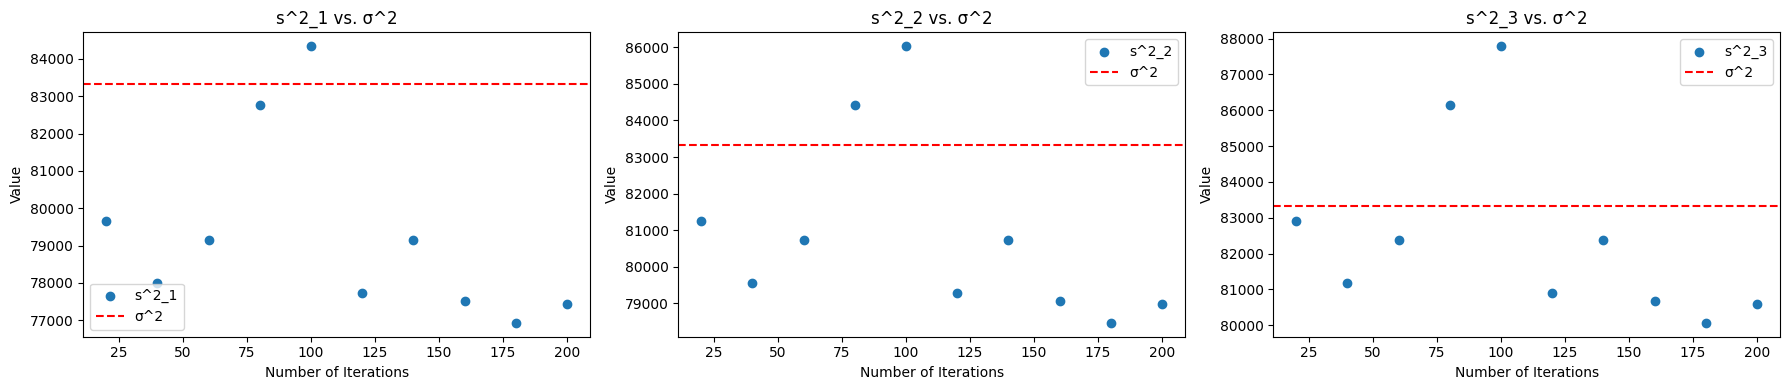

Average s^2_1: [82364.21167665099, 82489.30434262747, 78265.41136982747, 80294.89910755293, 80804.50337522352, 82809.7936371843, 81104.14444741176, 78884.80661475296, 76566.39621801568, 84037.48707103528]
Average s^2_2: [84011.495910184, 84139.09042948001, 79830.71959722397, 81900.79708970398, 82420.593442728, 84465.98950992801, 82726.22733636, 80462.50274704801, 78097.72414237601, 85718.236812456]
Average s^2_3: [85726.01623488162, 85856.21472395919, 81459.917956351, 83572.24192826939, 84102.64637013062, 86189.78521421224, 84414.51769016327, 82104.59463984492, 79691.55524732241, 87467.58858413878]


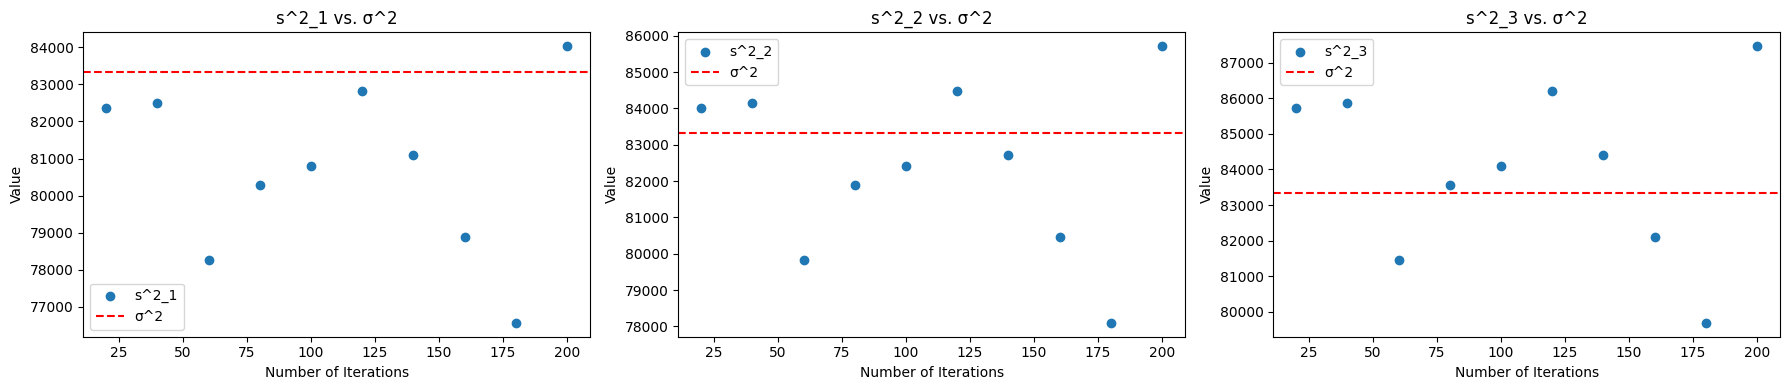

Average s^2_1: [79325.8041424706, 79433.14511439216, 82962.82219373333, 80815.40577020391, 83850.27488292547, 84420.55388314511, 79864.5649382039, 74197.7996499216, 81884.3370665804, 78405.13332270588]
Average s^2_2: [80912.32022532003, 81021.80801667999, 84622.078637608, 82431.713885608, 85527.28038058401, 86108.96496080799, 81461.856236968, 75681.75564292, 83522.023807912, 79973.23598915999]
Average s^2_3: [82563.59206665306, 82675.31430273471, 86349.05983429388, 84113.99376082451, 87272.73508222855, 87866.2907763347, 83124.34309894693, 77226.28126828572, 85226.55490603266, 81605.34284608164]


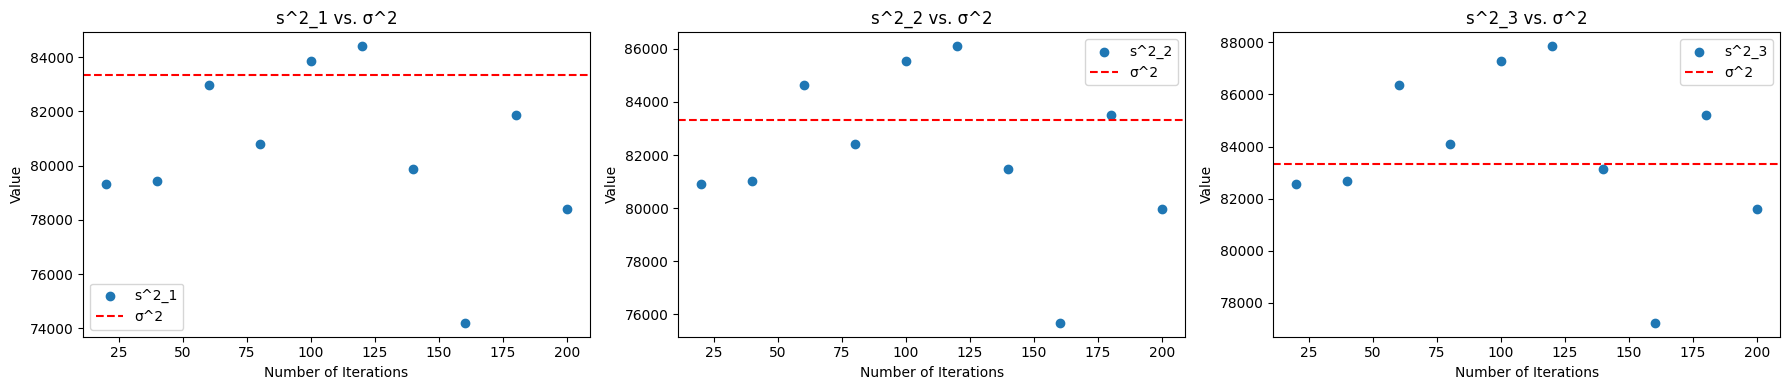

Average s^2_1: [84209.84567583527, 74596.57216731766, 81593.58788923138, 80119.58581550587, 81744.49523254117, 81373.15475404706, 82279.02375156862, 79348.60236540393, 79391.76851718433, 79539.51972722352]
Average s^2_2: [85894.042589352, 76088.50361066402, 83225.459647016, 81721.97753181601, 83379.385137192, 83000.61784912802, 83924.6042266, 80935.574412712, 80979.603887528, 81130.31012176801]
Average s^2_3: [87646.98223403265, 77641.33021496327, 84923.93841532245, 83389.77299164899, 85081.00524203267, 84694.50800931429, 85637.35125163264, 82587.32082929797, 82632.2488648245, 82786.03073649797]


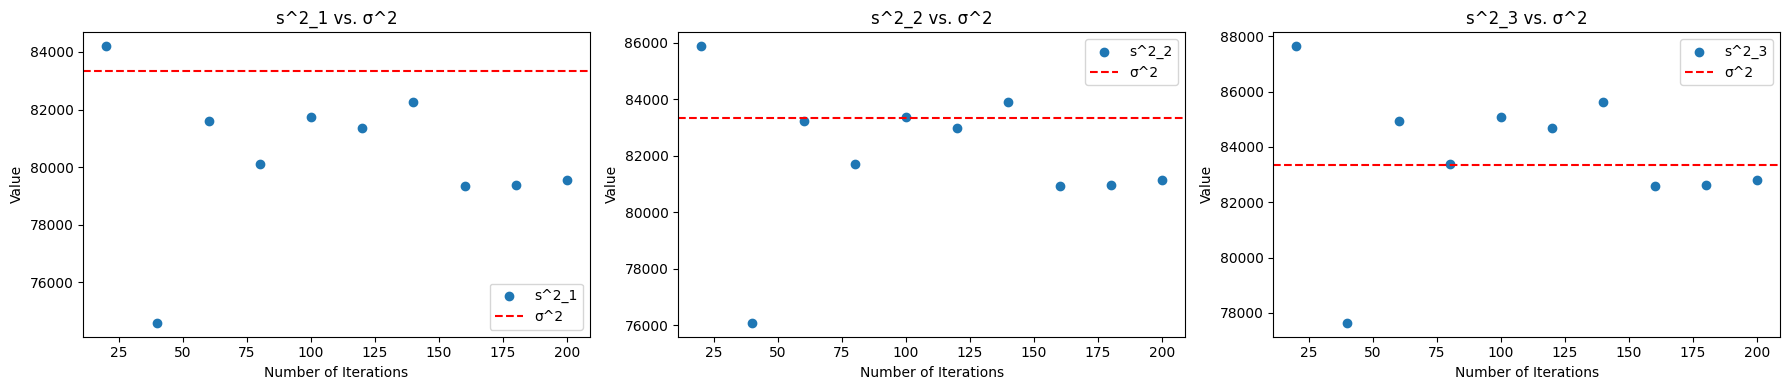

Average s^2_1: [80093.50947254118, 81464.14239903529, 77493.47814667452, 83975.49443304315, 84217.05813261963, 81934.96317130196, 77615.45266626668, 80266.08285757646, 77166.37806472939, 76105.37494190587]
Average s^2_2: [81695.379661992, 83093.425247016, 79043.347709608, 85655.004321704, 85901.39929527199, 83573.662434728, 79167.761719592, 81871.404514728, 78709.70562602399, 77627.48244074402]
Average s^2_3: [83362.6323081551, 84789.20943573062, 80656.47725470204, 87403.06563439184, 87654.48907680817, 85279.24738237553, 80783.43032611428, 83542.24950482446, 80316.02614900407, 79211.7167762694]


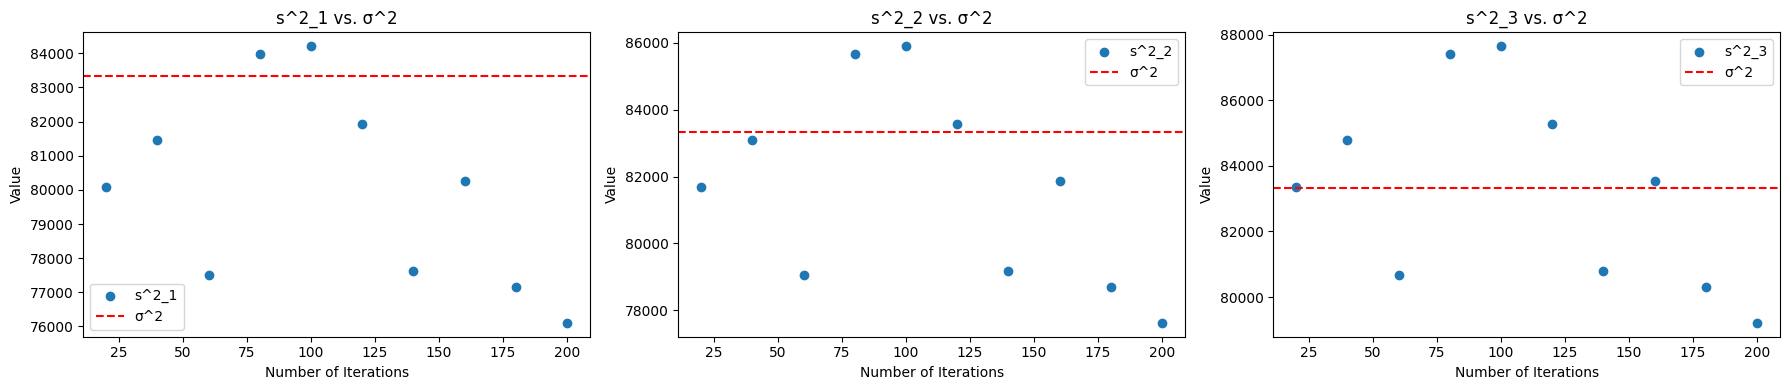

Average s^2_1: [79685.05940960784, 76438.10609986668, 79937.72251586667, 79989.67268785098, 78079.79743200786, 80107.0658638196, 77588.24716992158, 78228.28788747451, 78803.14430962353, 82153.61298789803]
Average s^2_2: [81278.76059779999, 77966.86822186399, 81536.47696618401, 81589.466141608, 79641.393380648, 81709.20718109598, 79140.01211332, 79792.853645224, 80379.20719581601, 83796.68524765599]
Average s^2_3: [82937.51081408163, 79558.02879782041, 83200.48670018776, 83254.5572873551, 81266.72793943674, 83376.74202152652, 80755.11440134695, 81421.2792298204, 82019.59917940407, 85506.82168128164]


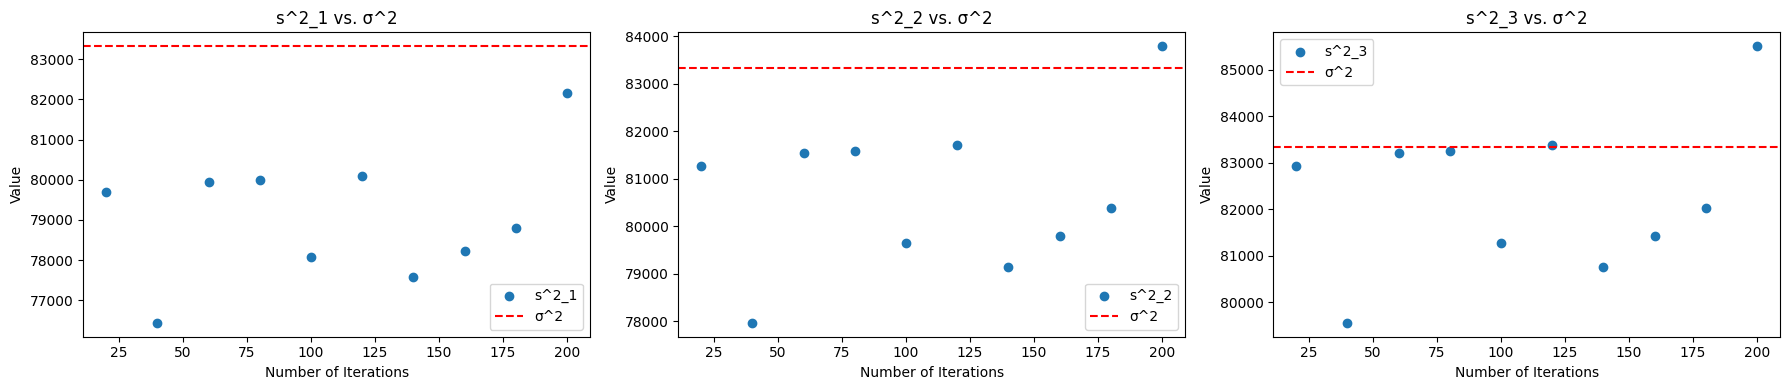

Average s^2_1: [80481.23526127842, 79241.67940496471, 75818.29367922354, 78913.53644741177, 80149.09877952158, 84701.58648185883, 79827.31852126274, 76533.83725996078, 85826.74409955293, 80725.8236036157]
Average s^2_2: [82090.85996650401, 80826.512993064, 77334.659552808, 80491.80717636, 81752.08075511202, 86395.61821149601, 81423.864891688, 78064.51400516, 87543.278981544, 82340.340075688]
Average s^2_3: [83766.1836392898, 82476.03366639183, 78912.91791102858, 82134.49711873471, 83420.49056644083, 88158.79409336326, 83085.5764200898, 79657.66735220408, 89329.87651177958, 84020.75517927346]


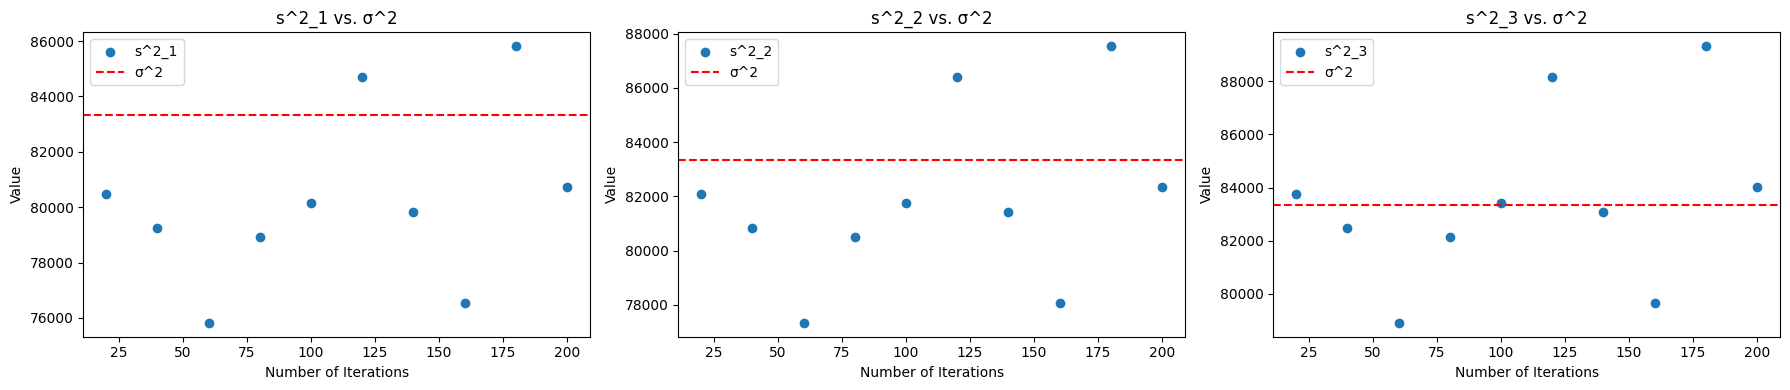

Average s^2_1: [79651.82189682353, 79315.91350491767, 81493.91603254118, 80535.15667128628, 80145.40203185097, 80987.93992386667, 74412.20415627451, 83069.23815759216, 81318.56532760001, 81257.6844787843]
Average s^2_2: [81244.85833476, 80902.231775016, 83123.794353192, 82145.85980471199, 81748.310072488, 82607.698722344, 75900.44823940001, 84730.62292074402, 82944.93663415202, 82882.83816836003]
Average s^2_3: [82902.91666812247, 82553.29772960817, 84820.19831958368, 83822.3059231755, 83416.64293111021, 84293.57012484081, 77449.43697897959, 86459.81930688166, 84637.69044301225, 84574.32466159183]


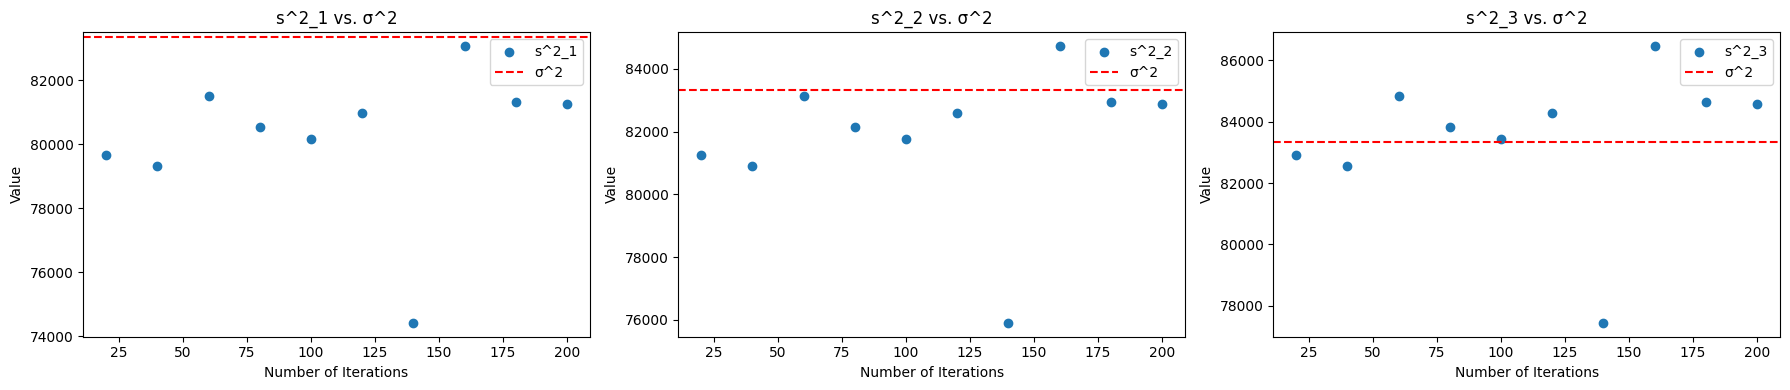

In [407]:
for x in range(10): 
   # Initialize average scores
    avg_s1_squared = 0
    avg_s2_squared = 0
    avg_s3_squared = 0
    # Number of iterations
    num_iterations = 10  # You can change this to the desired number of iterations
    list_of_average_s1_2 , list_of_average_s2_2 , list_of_average_s3_2 = [],[],[]
    iterations = []
    # Perform multiple iterations
    # plotting every 20 , 5 times
    iteration_count = 0
    for iteration in range(num_iterations):
        avg_s1_squared = 0 
        avg_s2_squared = 0 
        avg_s3_squared = 0
        for t in range (20):
            # Perform sampling with replacement to randomly select 50 points from the population
            fiftypoints= []
            totalpoints = 100000
            sample_size = 50
            # Choose 50 unique indexes without repetition
            while len(fiftypoints) < 50 :
                index = random_generator.rand() % totalpoints
                # if index not in fiftyindex:
                fiftypoints.append(data_points[index])

            meanoffiftypoints = sum(fiftypoints) /50
            numerators = [ (x - meanoffiftypoints) ** 2 for x in fiftypoints]
            numerator_after_addsquare_mean = sum(numerators)
            
            # Calculate s^2_1, s^2_2, and s^2_3 for the current iteration
            s1_squared = numerator_after_addsquare_mean/51 # Sample variance with population correction
            s2_squared = numerator_after_addsquare_mean/50  # Sample variance with Bessel's correction
            s3_squared = numerator_after_addsquare_mean/49  # Sample variance with another degree of freedom
            avg_s1_squared += (s1_squared)
            avg_s2_squared += (s2_squared)
            avg_s3_squared += (s3_squared)
        iteration_count += 20
        iterations.append(iteration_count)
            
        avg_s1_squared = avg_s1_squared / 20
        avg_s2_squared = avg_s2_squared / 20
        avg_s3_squared = avg_s3_squared / 20
        list_of_average_s1_2.append(avg_s1_squared)
        list_of_average_s2_2.append(avg_s2_squared)
        list_of_average_s3_2.append(avg_s3_squared)
        
        
    # Print the average scores after multiple iterations
    print("Average s^2_1:", list_of_average_s1_2)
    print("Average s^2_2:", list_of_average_s2_2)
    print("Average s^2_3:", list_of_average_s3_2)

    # import matplotlib.pyplot as plt

    plt.figure(figsize=(18, 4))

    # Scatter plot for s^2_1
    plt.subplot(131)
    plt.scatter(iterations, list_of_average_s1_2, label='s^2_1', marker='o')
    plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')

    # plt.plot(iterations, true_variance, label='σ^2', linestyle='--', color='red')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value')
    plt.title('s^2_1 vs. σ^2')
    plt.legend()

    plt.subplot(132)
    plt.scatter(iterations, list_of_average_s2_2, label='s^2_2', marker='o')
    plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value')
    plt.title('s^2_2 vs. σ^2')
    plt.legend()

    plt.subplot(133)
    plt.scatter(iterations, list_of_average_s3_2, label='s^2_3', marker='o')
    plt.axhline(y=true_variance, color='red', linestyle='--', label='σ^2')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Value')
    plt.title('s^2_3 vs. σ^2')
    plt.legend()

    plt.tight_layout()
    plt.show()


## From the graphs, it's visible that s^2_3 , is reaching the true variance earliest.
## Degrees of freedom refer to the number of independent pieces of information available in a sample to estimate a parameter. In the context of variance estimates:


#### Since there is one less degree of freedom then n, because we have the sample variance is already defined
### However,  using (n - 1) degrees of freedom (as in s^2_3) should be done when estimating the population variance from a sample because it provides a less biased estimate of the true population variance. This correction accounts for the fact that you've already used one degree of freedom to calculate the sample mean.

## (as in s^2_2) , assume n degrees of freedom , but since we have defined , sample variance it doesn't take account of it  , and hence, the value is although close but not as close as 3rd one and doesn't reach it as fast as 3rd

## (as in s^2_1) , assume n+1 degrees of freedom , but since we have defined , sample variance it doesn't take account of it , and even after that it takes one more degree of freedom , and hence, the value is not even as close as second and reaches true_variance slower than 2nd one also , (even slower, and farther than 3rd)
 